<div style = "text-align: center;">
    <h1> Accident Metadata for Enhanced Analysis </h1>
</div>

<center><img src="https://www.maryamparman.com/wp-content/uploads/2023/07/best-san-francisco-car-accident-lawyer.png" /></center>

<div style = "text-align: center;">
    <h1> Team Accident Analysis Avengers (AAA) </h1>
</div>

<div style = "text-align: center;">
    <h3> Ansh Dugar, Balaji Udayakumar, Ei Aung, Harshit Kavathia, Joshua Mohammed, Lirong Huang, Sanskriti Yadav </h3> </div>

### *Section 1: Project Overview*

# Understanding the Significance of Collisions

Motor vehicle collisions present a major threat to the lives of humans as it results in a notable loss of human lives each year. Motor vehicle collisions not only claim a significant number of lives each year but also result in countless injuries, many of which lead to long-term disabilities and trauma for survivors and their families. According to the Centers for Disease Control and Prevention (CDC), road traffic crashes are a leading cause of death in the United States for people ages 1-54.

# Project Overview

In this project, we will analyze two datasets that contain data from all crashes resulting in injury in San Francisco, California from 2005 till 2023. As a team, we aim to analyze the data in order to provide valuable information related to public safety, create predictive models to reduce the risk of collisions and help the U.S. government make more informed decisions.

# Questions of Interest

In this project, we aim to answer the following three main questions:

1. Are there any geographic hotspots or any other patterns in collisions?

2. How do vehicle brands, their safety equipment, and their year of manufacturing affect collisions?

3. How can pedestrians and vehicle drivers be more cautious to avoid collisions?

# Updates to Our Thinking

*Updates:*

1. "Discover patterns and factors contributing to collisions"
    - We eliminated this task as it is very redundant through our project and analysis
2. "Create a pie and bar chart for Question 2"
    - We did not create a pie chart after reviewing the data visualization packages lecture from class as it does not provide a sufficient analysis
3. "Determine the impact of weather and lighting involved in collisions"
    - For the lighting aspect of this question, we need to conduct further analysis in order to express a better story through observations and inferences.
4. "Create bar charts, scatter plot, line chart for Question 3"
    - We did not complete this task as of yet as we are reevaluating the need of certain data visualizations for Question 3. We are thinking of differing ways to display the information in order to properly tell a story for Question 3.


*In order to increase the difficulty of our project as advised by our professor we will:*

1. We created a HeatMap of San Francisco marking every collision sites
2. Use NLP to gain more insights from the collision description within our dataset

### *Section 2: Milestones and Progress*

# Project Milestones
Below are the project milestones from the proposal with corresponding dates up to November 10th:

1.   Managing Missing Data (NaN).
2.   Renaming Columns.
3.   Eliminate Duplicates and Outliers.
4.   Formatting and transforming certain columns to get rid of inconsistencies to fit our needs.
5. Extracting New Features from Dataset.
6.  Mapping hotspots for collisions.
7. Determine collision severity under each type of weather condition.
8. Create a hotspot map and bar chart for our Question 1 i.e. are there any geographic hotspots or any other patterns in collisions?
9. Discover relationship between vehicle brand and collisions.
10. Discover relationship between vehicle equipment and collisions.
11. Discover relationship between the year of manufacturing of vehicle and year of collisions.
12. Create a pie chart and a bar chart for Question 2 i.e. how do vehicle brands, their safety equipment, and their year of manufacturing affect collisions?
13. Determine the impact of weather and lighting involved in collisions(In Progress)
14. Create bar charts, scatter plot, line chart for our Question 3 i.e. how can pedestrians and vehicle drivers be more cautious to avoid collisions?


#### Status Update:

As of November 10th, all planned milestones have been completed except for determining the impact of lighting involved in collisions. The analysis for this task is currently in progress.

#### Next Steps and Resources Needed:

To catch up on the incomplete task, we will allocate additional time for the analysis of the impact of lighting in collisions. This may involve exploring different visualization techniques and statistical methods to derive meaningful insights.


#### Resources Needed:

Additional data or research on the impact of lighting in collisions.
Time for further analysis and exploration.

#### Uncertainty in the Plan:

The plan has been clear for the most part, but the analysis of lighting impact requires careful consideration of various factors. Uncertainty may arise in interpreting the results or choosing the most appropriate visualization method. Regular collaboration with team members and seeking expert opinions can help mitigate uncertainties.

### *Section 3: Data Acquisition and Cleaning Code*

So far, we have completed all tasks that are listed above. After loading both data sets, we have finished cleaning the data as we have:
- Dropped unnessecary columns that are not relevant for our analysis
- Renamed columns
- Eliminate duplicates
- Transforming the data to cater towards our analysis
- Extracting unique features from our data set

These tasks are displayed below

In [1]:
# If folium library is not there in the system execute the below command to install folium
# pip install folium

In [2]:
# Import all the necessary libraries for our project
import folium
from folium import plugins
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn
import datetime as dt

# Cleaning the Data Sets

### (1) Collision Data Set

In [3]:
# Load the Collision Data Set

collision_df = pd.read_csv('Traffic_Crashes_Resulting_in_Injury.csv', index_col='unique_id')
collision_df

/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/1207776611.py:3: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv('Traffic_Crashes_Resulting_in_Injury.csv', index_col='unique_id')


,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
unique_id,,,,,,,,,,,,,,,,,,,,,
15414,23926000,NaN,151003670,37.777857,-122.406436,SFPD-CROSSROADS,CITY STREET,11/18/15 9:04,2015 November 18,9:04:00,...,Proceeding Straight,POINT (-122.40643 37.777855),11/18/15 0:00,4/26/23 0:00,9/30/23 3:30,32.0,32.0,1.0,10.0,34.0
52640,23969000,NaN,200212108,37.754453,-122.408343,SFPD-INTERIM DB,CITY STREET,3/28/20 14:35,2020 March 28,14:35:00,...,Proceeding Straight,POINT (-122.40834 37.75445),4/2/20 0:00,4/26/23 0:00,9/30/23 3:30,53.0,53.0,3.0,2.0,20.0
36577,22495000,5408000.0,140836694,37.714040,-122.461135,SFPD-CROSSROADS,CITY STREET,10/4/14 13:25,2014 October 04,13:25:00,...,Proceeding Straight,POINT (-122.461136 37.71404),10/4/14 0:00,4/26/23 0:00,9/30/23 3:30,81.0,81.0,10.0,1.0,24.0
27582,24726000,9299000.0,160732947,37.791627,-122.402516,SFPD-CROSSROADS,CITY STREET,9/8/16 14:00,2016 September 08,14:00:00,...,Not Stated,POINT (-122.40252 37.791626),9/8/16 0:00,4/26/23 0:00,9/30/23 3:30,108.0,108.0,6.0,3.0,8.0
14911,23811000,179000.0,180566685,37.779856,-122.394008,SFPD-INTERIM DB,CITY STREET,7/30/18 11:25,2018 July 30,11:25:00,...,NaN,POINT (-122.394005 37.779858),10/22/18 0:00,4/26/23 0:00,9/30/23 3:30,31.0,31.0,1.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60030,20618000,NaN,220716801.0,37.729211,-122.400834,SFPD-INTERIM DB,CITY STREET,10/18/22 17:09,2022 October 18,17:09:00,...,Proceeding Straight,POINT (-122.40083 37.72921),2/1/23 0:00,4/27/23 0:00,9/30/23 3:33,86.0,86.0,2.0,9.0,1.0
59928,23150000,923101.0,220678574.0,37.737605,-122.475224,SFPD-INTERIM DB,CITY STREET,10/3/22 16:45,2022 October 03,16:45:00,...,Stopped,POINT (-122.47523 37.737606),2/1/23 0:00,4/27/23 0:00,9/30/23 3:33,46.0,46.0,10.0,7.0,41.0
21803,25958000,NaN,3497597.0,37.778329,-122.426642,SFPD-CROSSROADS,CITY STREET,11/18/07 13:25,2007 November 18,13:25:00,...,Proceeding Straight,POINT (-122.42664 37.778328),11/18/07 0:00,4/26/23 0:00,9/30/23 3:33,22.0,22.0,4.0,11.0,9.0


## Data Exploration (Exploratory Data Analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the data you are working with:

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different datatypes?
3. Whats missing from the data and how do we deal with it?
4. How can you add, change or remove features to get more out of your data?

In [4]:
# Describes the datatypes of each column
collision_df.dtypes

cnn_intrsctn_fkey                 int64
cnn_sgmt_fkey                   float64
case_id_pkey                     object
tb_latitude                     float64
tb_longitude                    float64
geocode_source                   object
geocode_location                 object
collision_datetime               object
collision_date                   object
collision_time                   object
accident_year                     int64
month                            object
day_of_week                      object
time_cat                         object
juris                            object
officer_id                       object
reporting_district               object
beat_number                      object
primary_rd                       object
secondary_rd                     object
distance                        float64
direction                        object
weather_1                        object
weather_2                        object
collision_severity               object


In [5]:
# Displays critical information about the dataframe
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56009 entries, 15414 to 47771
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cnn_intrsctn_fkey             56009 non-null  int64  
 1   cnn_sgmt_fkey                 25199 non-null  float64
 2   case_id_pkey                  56009 non-null  object 
 3   tb_latitude                   55862 non-null  float64
 4   tb_longitude                  55862 non-null  float64
 5   geocode_source                56009 non-null  object 
 6   geocode_location              56009 non-null  object 
 7   collision_datetime            56009 non-null  object 
 8   collision_date                56009 non-null  object 
 9   collision_time                55953 non-null  object 
 10  accident_year                 56009 non-null  int64  
 11  month                         56009 non-null  object 
 12  day_of_week                   56001 non-null  object 
 1

In [6]:
# Works on the int data type of the dataframe
collision_df.describe()

,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_at_fault,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
count,5.600900e+04,2.519900e+04,55862.000000,55862.000000,56009.000000,55930.000000,56006.000000,56009.000000,50463.000000,55236.000000,55236.000000,55778.000000,55817.000000,55804.000000
mean,2.587432e+07,6.971339e+06,37.765905,-122.428868,2013.565213,56.946826,0.009588,1.257994,1.013495,53.745474,53.745474,5.163129,6.619238,20.693803
std,4.920412e+06,4.075008e+06,0.024434,0.028407,5.196015,273.890229,0.099624,0.703334,0.126210,32.679027,32.679027,2.979027,3.375530,12.332206
min,2.000600e+07,1.000000e+05,37.707459,-122.513616,2005.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.387100e+07,3.454500e+06,37.749041,-122.443431,2009.000000,0.000000,0.000000,1.000000,1.000000,28.000000,28.000000,3.000000,3.000000,9.000000
50%,2.493600e+07,7.311000e+06,37.772569,-122.421578,2014.000000,0.000000,0.000000,1.000000,1.000000,50.000000,50.000000,4.000000,7.000000,20.000000
75%,2.670400e+07,1.014700e+07,37.783933,-122.408490,2018.000000,52.000000,0.000000,1.000000,1.000000,86.000000,86.000000,8.000000,10.000000,34.000000
max,5.436600e+07,1.999910e+07,37.829991,-122.358328,2023.000000,26400.000000,3.000000,19.000000,5.000000,117.000000,117.000000,10.000000,11.000000,41.000000


**We will first drop the unnecessary columns that are not relevant for our analysis. Then, we will rename the columns in order to enhance clarity. Next, we will drop any duplicate values in order to reduce the redundancy of the data.**

In [7]:
# Drop the unnecessary columns and Display the first 5 rows

unnecessary_columns = ['distance','vz_pcf_code','vz_pcf_group','officer_id','reporting_district','cnn_intrsctn_fkey','cnn_sgmt_fkey','case_id_pkey','geocode_location','beat_number','weather_2','mviw','road_cond_2','dph_col_grp','party_at_fault','party2_type','party2_dir_of_travel','party2_move_pre_acc','point','data_as_of','data_updated_at','data_loaded_at','Neighborhoods','SF Find Neighborhoods','Current Police Districts','Current Supervisor Districts','Analysis Neighborhoods']
collision_df.drop(unnecessary_columns, axis = 1, inplace=True)
collision_df.head()

,tb_latitude,tb_longitude,geocode_source,collision_datetime,collision_date,collision_time,accident_year,month,day_of_week,time_cat,...,intersection,vz_pcf_description,vz_pcf_link,number_killed,number_injured,street_view,dph_col_grp_description,party1_type,party1_dir_of_travel,party1_move_pre_acc
unique_id,,,,,,,,,,,,,,,,,,,,,
15414,37.777857,-122.406436,SFPD-CROSSROADS,11/18/15 9:04,2015 November 18,9:04:00,2015,November,Wednesday,6:01 am to 10:00 am,...,Intersection <= 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Driver,East,Making Right Turn
52640,37.754453,-122.408343,SFPD-INTERIM DB,3/28/20 14:35,2020 March 28,14:35:00,2020,March,Saturday,2:01 pm to 6:00 pm,...,Intersection <= 20ft,Failure to stop at STOP sign,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Bicyclist,East,Proceeding Straight
36577,37.714040,-122.461135,SFPD-CROSSROADS,10/4/14 13:25,2014 October 04,13:25:00,2014,October,Saturday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Driver,North,Backing
27582,37.791627,-122.402516,SFPD-CROSSROADS,9/8/16 14:00,2016 September 08,14:00:00,2016,September,Thursday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle-Parked Car,Parked Vehicle,South,Parked
14911,37.779856,-122.394008,SFPD-INTERIM DB,7/30/18 11:25,2018 July 30,11:25:00,2018,July,Monday,10:01 am to 2:00 pm,...,Midblock > 20ft,Not Stated,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle Only,Bicyclist,North,Proceeding Straight


In [8]:
# Display all the columns
collision_df.columns

Index(['tb_latitude', 'tb_longitude', 'geocode_source', 'collision_datetime',
       'collision_date', 'collision_time', 'accident_year', 'month',
       'day_of_week', 'time_cat', 'juris', 'primary_rd', 'secondary_rd',
       'direction', 'weather_1', 'collision_severity', 'type_of_collision',
       'ped_action', 'road_surface', 'road_cond_1', 'lighting',
       'control_device', 'intersection', 'vz_pcf_description', 'vz_pcf_link',
       'number_killed', 'number_injured', 'street_view',
       'dph_col_grp_description', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc'],
      dtype='object')

In [9]:
# Renaming the columns
collision_df= collision_df.rename(columns={
    'tb_latitude': 'Latitude',
    'tb_longitude': 'Longitude',
    'geocode_source': 'Geocode_Source',
    'collision_datetime': 'Collision_Datetime',
    'collision_date': 'Collision_Date',
    'collision_time': 'Collision_Time',
    'accident_year': 'Accident_Year',
    'month': 'Month',
    'day_of_week': 'Day_of_Week',
    'time_cat': 'Time_Category',
    'juris': 'Jurisdiction',
    'primary_rd': 'Primary_Road',
    'secondary_rd': 'Secondary_Road',
    'direction': 'Direction',
    'weather_1': 'Weather',
    'collision_severity': 'Collision_Severity',
    'type_of_collision': 'Collision_Type',
    'ped_action': 'Pedestrian_Action',
    'road_surface': 'Road_Surface',
    'road_cond_1': 'Road_Condition',
    'lighting': 'Lighting',
    'control_device': 'Control_Device',
    'intersection': 'Intersection',
    'vz_pcf_description': 'VZ_PCF_Description',
    'vz_pcf_link': 'VZ_PCF_Link',
    'number_killed': 'Number_Killed',
    'number_injured': 'Number_Injured',
    'street_view': 'Street_View',
    'dph_col_grp_description': 'DPH_Column_Group_Description',
    'party1_type': 'Party_1_Type',
    'party1_dir_of_travel': 'Party_1_Direction_of_Travel',
    'party1_move_pre_acc': 'Party_1_Movement_Prior_to_Accident'
})

In [10]:
# Display top 5 rows
collision_df.head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Intersection,VZ_PCF_Description,VZ_PCF_Link,Number_Killed,Number_Injured,Street_View,DPH_Column_Group_Description,Party_1_Type,Party_1_Direction_of_Travel,Party_1_Movement_Prior_to_Accident
unique_id,,,,,,,,,,,,,,,,,,,,,
15414,37.777857,-122.406436,SFPD-CROSSROADS,11/18/15 9:04,2015 November 18,9:04:00,2015,November,Wednesday,6:01 am to 10:00 am,...,Intersection <= 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Driver,East,Making Right Turn
52640,37.754453,-122.408343,SFPD-INTERIM DB,3/28/20 14:35,2020 March 28,14:35:00,2020,March,Saturday,2:01 pm to 6:00 pm,...,Intersection <= 20ft,Failure to stop at STOP sign,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Bicyclist,East,Proceeding Straight
36577,37.714040,-122.461135,SFPD-CROSSROADS,10/4/14 13:25,2014 October 04,13:25:00,2014,October,Saturday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Driver,North,Backing
27582,37.791627,-122.402516,SFPD-CROSSROADS,9/8/16 14:00,2016 September 08,14:00:00,2016,September,Thursday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle-Parked Car,Parked Vehicle,South,Parked
14911,37.779856,-122.394008,SFPD-INTERIM DB,7/30/18 11:25,2018 July 30,11:25:00,2018,July,Monday,10:01 am to 2:00 pm,...,Midblock > 20ft,Not Stated,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle Only,Bicyclist,North,Proceeding Straight


In [11]:
# Sorting by Unique ID
collision_df.sort_index().head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Intersection,VZ_PCF_Description,VZ_PCF_Link,Number_Killed,Number_Injured,Street_View,DPH_Column_Group_Description,Party_1_Type,Party_1_Direction_of_Travel,Party_1_Movement_Prior_to_Accident
unique_id,,,,,,,,,,,,,,,,,,,,,
1,37.708765,-122.395355,SFPD-CROSSROADS,11/11/12 17:35,2012 November 11,17:35:00,2012,November,Sunday,2:01 pm to 6:00 pm,...,Midblock > 20ft,Pedestrian on roadway prohibited,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,3,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Pedestrian,West,Proceeding Straight
2,37.708730,-122.395579,SFPD-CROSSROADS,9/18/14 7:05,2014 September 18,7:05:00,2014,September,Thursday,6:01 am to 10:00 am,...,Midblock > 20ft,Unknown,Not Stated,0.0,2,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle(s) Only Involved,Driver,East,Not Stated
3,37.708617,-122.405326,SFPD-CROSSROADS,10/10/06 10:57,2006 October 10,10:57:00,2006,October,Tuesday,10:01 am to 2:00 pm,...,Midblock > 20ft,Lane straddling or failure to use specified lanes,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle(s) Only Involved,Driver,South,Proceeding Straight
4,37.708648,-122.405312,SFPD-CROSSROADS,7/5/15 4:59,2015 July 05,4:59:00,2015,July,Sunday,2:01 am to 6:00 am,...,Intersection Rear End <= 150ft,Unsafe speed for prevailing conditions,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle(s) Only Involved,Driver,South,Proceeding Straight
5,37.708393,-122.413823,SFPD-CROSSROADS,5/10/09 17:17,2009 May 10,17:17:00,2009,May,Sunday,2:01 pm to 6:00 pm,...,Midblock > 20ft,Pedestrians must yield right-of-way outside of...,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Pedestrian,Not Stated,Other


In [12]:
# Checking for duplicate values in the dataset
collision_df.duplicated().sum()

32

In [13]:
# Drop any duplicate values
collision_df = collision_df.drop_duplicates()
collision_df.head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Intersection,VZ_PCF_Description,VZ_PCF_Link,Number_Killed,Number_Injured,Street_View,DPH_Column_Group_Description,Party_1_Type,Party_1_Direction_of_Travel,Party_1_Movement_Prior_to_Accident
unique_id,,,,,,,,,,,,,,,,,,,,,
15414,37.777857,-122.406436,SFPD-CROSSROADS,11/18/15 9:04,2015 November 18,9:04:00,2015,November,Wednesday,6:01 am to 10:00 am,...,Intersection <= 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Driver,East,Making Right Turn
52640,37.754453,-122.408343,SFPD-INTERIM DB,3/28/20 14:35,2020 March 28,14:35:00,2020,March,Saturday,2:01 pm to 6:00 pm,...,Intersection <= 20ft,Failure to stop at STOP sign,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Bicyclist,East,Proceeding Straight
36577,37.714040,-122.461135,SFPD-CROSSROADS,10/4/14 13:25,2014 October 04,13:25:00,2014,October,Saturday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Driver,North,Backing
27582,37.791627,-122.402516,SFPD-CROSSROADS,9/8/16 14:00,2016 September 08,14:00:00,2016,September,Thursday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle-Parked Car,Parked Vehicle,South,Parked
14911,37.779856,-122.394008,SFPD-INTERIM DB,7/30/18 11:25,2018 July 30,11:25:00,2018,July,Monday,10:01 am to 2:00 pm,...,Midblock > 20ft,Not Stated,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle Only,Bicyclist,North,Proceeding Straight


**Now, we will determine the total missing values of each column. In order to address this issue, we will drop the missing values within certain columns and impute values into certain columns that we deem necessary.**

In [14]:
# View the total missing values
collision_df.isna().sum()

Latitude                              147
Longitude                             147
Geocode_Source                          0
Collision_Datetime                      0
Collision_Date                          0
Collision_Time                         56
Accident_Year                           0
Month                                   0
Day_of_Week                             8
Time_Category                          51
Jurisdiction                            0
Primary_Road                            0
Secondary_Road                         92
Direction                               1
Weather                                 0
Collision_Severity                      0
Collision_Type                          0
Pedestrian_Action                       0
Road_Surface                            0
Road_Condition                          0
Lighting                                0
Control_Device                          0
Intersection                            1
VZ_PCF_Description                

In [15]:
# Handling missing values using dropna()
collision_df = collision_df.dropna(subset = ['Latitude', 'Longitude', 'Day_of_Week','Intersection','Time_Category', 'VZ_PCF_Link','Street_View','Number_Killed'])

In [16]:
# Fill the Party 1 Type column
collision_df['Party_1_Type'].fillna('Not Stated', inplace = True)

# Fill the Party 1 Direction of Travel column
collision_df['Party_1_Direction_of_Travel'].fillna('Not Stated', inplace = True)

# Fill the Party 1 Movement Prior to Accident column
collision_df['Party_1_Movement_Prior_to_Accident'].fillna('Not Stated', inplace = True)

# Fill the Direction column
collision_df['Direction'].fillna('Not Stated', inplace = True)

# Replace missing values for Secondary Road
collision_df['Secondary_Road'].replace('...', 'missing', inplace = True)

In [17]:
# Check which missing values remain
collision_df.isna().sum()

Latitude                              0
Longitude                             0
Geocode_Source                        0
Collision_Datetime                    0
Collision_Date                        0
Collision_Time                        5
Accident_Year                         0
Month                                 0
Day_of_Week                           0
Time_Category                         0
Jurisdiction                          0
Primary_Road                          0
Secondary_Road                        6
Direction                             0
Weather                               0
Collision_Severity                    0
Collision_Type                        0
Pedestrian_Action                     0
Road_Surface                          0
Road_Condition                        0
Lighting                              0
Control_Device                        0
Intersection                          0
VZ_PCF_Description                    0
VZ_PCF_Link                           0


In [18]:
# Secondary Road still has 11 missing values
collision_df.dropna(subset = ['Secondary_Road'], inplace=True)

In [ ]:
# Converting Collision Datetime column to datetime format
collision_df['Collision_Datetime'] = pd.to_datetime(collision_df['Collision_Datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Extracting the time component from Collision Datetime to impute missing values in Collision Time
collision_df['Collision_Time'] = collision_df['Collision_Time'].fillna(collision_df['Collision_Datetime'].dt.strftime('%I:%M:%S %p'))

In [21]:
# Check which missing values remain
collision_df.isna().sum()

Latitude                              0
Longitude                             0
Geocode_Source                        0
Collision_Datetime                    0
Collision_Date                        0
Collision_Time                        5
Accident_Year                         0
Month                                 0
Day_of_Week                           0
Time_Category                         0
Jurisdiction                          0
Primary_Road                          0
Secondary_Road                        0
Direction                             0
Weather                               0
Collision_Severity                    0
Collision_Type                        0
Pedestrian_Action                     0
Road_Surface                          0
Road_Condition                        0
Lighting                              0
Control_Device                        0
Intersection                          0
VZ_PCF_Description                    0
VZ_PCF_Link                           0


In [22]:
# Resetting the index
collision_df.reset_index(drop = True, inplace=True)

# Now by default, the index starts from 0. So we will shift the index by 1 for the desired result and rename the index
collision_df.index += 1
collision_df.index.name = "Unique ID"

In [23]:
# Display the top rows
collision_df.head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Intersection,VZ_PCF_Description,VZ_PCF_Link,Number_Killed,Number_Injured,Street_View,DPH_Column_Group_Description,Party_1_Type,Party_1_Direction_of_Travel,Party_1_Movement_Prior_to_Accident
Unique ID,,,,,,,,,,,,,,,,,,,,,
1,37.777857,-122.406436,SFPD-CROSSROADS,11/18/15 9:04,2015 November 18,9:04:00,2015,November,Wednesday,6:01 am to 10:00 am,...,Intersection <= 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Driver,East,Making Right Turn
2,37.754453,-122.408343,SFPD-INTERIM DB,3/28/20 14:35,2020 March 28,14:35:00,2020,March,Saturday,2:01 pm to 6:00 pm,...,Intersection <= 20ft,Failure to stop at STOP sign,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Bicycle,Bicyclist,East,Proceeding Straight
3,37.714040,-122.461135,SFPD-CROSSROADS,10/4/14 13:25,2014 October 04,13:25:00,2014,October,Saturday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Vehicle-Pedestrian,Driver,North,Backing
4,37.791627,-122.402516,SFPD-CROSSROADS,9/8/16 14:00,2016 September 08,14:00:00,2016,September,Thursday,10:01 am to 2:00 pm,...,Midblock > 20ft,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle-Parked Car,Parked Vehicle,South,Parked
5,37.779856,-122.394008,SFPD-INTERIM DB,7/30/18 11:25,2018 July 30,11:25:00,2018,July,Monday,10:01 am to 2:00 pm,...,Midblock > 20ft,Not Stated,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,Bicycle Only,Bicyclist,North,Proceeding Straight


### (2) Collisions with Parties Invovled Data Set

In [24]:
# Load the Collisions with Parties Involved Data Set
collision_party_df = pd.read_csv('Traffic_Crashes_Resulting_in_Injury__Parties_Involved.csv', index_col='unique_id')
collision_party_df

/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/3035804528.py:2: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_party_df = pd.read_csv('Traffic_Crashes_Resulting_in_Injury__Parties_Involved.csv', index_col='unique_id')


,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,vehicle_autonomous,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
unique_id,,,,,,,,,,,,,,,,,,,,,
80027,32859000,184101.0,160692733,NaN,NaN,SFPD-CROSSROADS,CITY STREET,8/26/16 18:30,8/26/16 0:00,18:30:00,...,Not Collected,NaN,8/26/16 0:00,4/26/23 0:00,9/30/23 3:37,NaN,NaN,NaN,NaN,NaN
640798,25602000,NaN,230053461,37.750372,-122.422726,SFPD-INTERIM DB,CITY STREET,1/23/23 13:10,1/23/23 0:00,13:10:00,...,Not Stated,POINT (-122.42272 37.750374),5/2/23 0:00,5/2/23 0:00,9/30/23 3:33,53.0,53.0,3.0,5.0,20.0
32795,24459000,NaN,6049334,37.778251,-122.419883,SFPD-CROSSROADS,CITY STREET,12/1/12 18:18,12/1/12 0:00,18:18:00,...,Not Collected,POINT (-122.41988 37.77825),12/1/12 0:00,4/26/23 0:00,9/30/23 3:33,21.0,21.0,4.0,10.0,36.0
638313,35028000,19397001.0,220736401,37.728893,-122.370297,SFPD-INTERIM DB,CITY STREET,10/26/22 7:25,10/26/22 0:00,7:25:00,...,Not Stated,POINT (-122.3703 37.728893),2/1/23 0:00,4/27/23 0:00,9/30/23 3:33,78.0,78.0,2.0,9.0,1.0
64090,24378000,NaN,4491629,37.768140,-122.422199,SFPD-CROSSROADS,CITY STREET,11/26/09 2:44,11/26/09 0:00,2:44:00,...,Not Collected,POINT (-122.422195 37.76814),11/26/09 0:00,4/26/23 0:00,9/30/23 3:33,53.0,53.0,3.0,2.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71477,27496000,NaN,6076549,37.776595,-122.478033,SFPD-CROSSROADS,CITY STREET,4/7/12 11:49,4/7/12 0:00,11:49:00,...,Not Collected,POINT (-122.478035 37.776596),4/7/12 0:00,4/26/23 0:00,9/30/23 3:38,8.0,8.0,8.0,4.0,29.0
61550,24073000,NaN,4081449,37.750640,-122.418288,SFPD-CROSSROADS,CITY STREET,1/30/09 6:20,1/30/09 0:00,6:20:00,...,Not Collected,POINT (-122.41829 37.75064),1/30/09 0:00,4/26/23 0:00,9/30/23 3:38,53.0,53.0,3.0,2.0,20.0
24732,24054000,6746000.0,2172013,37.763860,-122.412983,SFPD-CROSSROADS,CITY STREET,7/19/05 13:37,7/19/05 0:00,13:37:00,...,Not Collected,POINT (-122.41299 37.76386),7/19/05 0:00,4/26/23 0:00,9/30/23 3:38,53.0,53.0,3.0,2.0,20.0


In [25]:
# Describes the datatypes of each column
collision_party_df.dtypes

cnn_intrsctn_fkey                 int64
cnn_sgmt_fkey                   float64
case_id_pkey                     object
tb_latitude                     float64
tb_longitude                    float64
                                 ...   
Neighborhoods                   float64
SF Find Neighborhoods           float64
Current Police Districts        float64
Current Supervisor Districts    float64
Analysis Neighborhoods          float64
Length: 84, dtype: object

In [26]:
# Displays critical information about the dataframe
collision_party_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118087 entries, 80027 to 61403
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   cnn_intrsctn_fkey             118087 non-null  int64  
 1   cnn_sgmt_fkey                 53469 non-null   float64
 2   case_id_pkey                  118087 non-null  object 
 3   tb_latitude                   117792 non-null  float64
 4   tb_longitude                  117792 non-null  float64
 5   geocode_source                118087 non-null  object 
 6   geocode_location              118087 non-null  object 
 7   collision_datetime            118087 non-null  object 
 8   collision_date                118087 non-null  object 
 9   collision_time                117965 non-null  object 
 10  accident_year                 118087 non-null  int64  
 11  month                         118087 non-null  object 
 12  day_of_week                   118071 non-

In [27]:
# Return description of the dataframe
collision_party_df.describe()

,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_number_ckey,party_age,party_number_killed,party_number_injured,vehicle_year,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
count,1.180870e+05,5.346900e+04,117792.000000,117792.000000,118087.000000,117926.000000,118081.000000,118087.000000,118087.000000,102040.000000,118087.000000,118087.000000,86622.000000,116464.000000,116464.000000,117619.000000,117704.000000,117680.000000
mean,2.581625e+07,6.959613e+06,37.765721,-122.429065,2013.531320,56.387404,0.009875,1.304030,1.652248,41.015200,0.004590,0.597856,2001.147053,53.875867,53.875867,5.177879,6.604066,20.731611
std,4.856663e+06,4.061991e+06,0.024505,0.028357,5.199797,253.181737,0.101667,0.774264,0.803346,17.880626,0.068711,0.662796,89.073299,32.705577,32.705577,2.980790,3.381670,12.326425
min,2.000600e+07,1.000000e+05,37.707459,-122.513616,2005.000000,0.000000,0.000000,0.000000,1.000000,-970.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.385400e+07,3.454000e+06,37.748711,-122.443696,2009.000000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,0.000000,2000.000000,28.000000,28.000000,3.000000,3.000000,9.000000
50%,2.493500e+07,7.281000e+06,37.772526,-122.421758,2014.000000,0.000000,0.000000,1.000000,2.000000,39.000000,0.000000,1.000000,2005.000000,50.000000,50.000000,4.000000,7.000000,20.000000
75%,2.669200e+07,1.014400e+07,37.783882,-122.408709,2018.000000,55.000000,0.000000,1.000000,2.000000,52.000000,0.000000,1.000000,2011.000000,86.000000,86.000000,8.000000,10.000000,34.000000
max,5.436600e+07,1.999910e+07,37.829991,-122.358328,2023.000000,26400.000000,3.000000,19.000000,23.000000,109.000000,3.000000,19.000000,5015.000000,117.000000,117.000000,10.000000,11.000000,41.000000


**We will first drop the unnecessary columns that are not relevant for our analysis. Then, we will rename the columns in order to enhance clarity. Next, we will drop any duplicate values in order to reduce the redundancy of the data.**

In [28]:
# Drop the unnecessary columns and Display the first 5 rows
collision_party_df.drop(columns=['cnn_intrsctn_fkey','cnn_sgmt_fkey','vz_pcf_group','party_number_ckey','case_id_pkey','juris', 'officer_id', 'reporting_district','geocode_location','beat_number','distance','direction','weather_2','road_cond_1','road_cond_2','control_device','intersection','dph_col_grp','party_drug_physical','party_safety_equip_2','sp_info_1','sp_info_2','sp_info_3','oaf_viol_cat','oaf_viol_section','oaf_violation_code','oaf_violation_suffix','oaf_1','oaf_2','party_number_injured','inattention','special_info_f','special_info_g','street_of_travel','vehicle_autonomous','point','data_as_of','data_updated_at','data_loaded_at','Neighborhoods','SF Find Neighborhoods','Current Police Districts','Current Supervisor Districts','Analysis Neighborhoods'],inplace=True)

In [29]:
# Display the first 5 rows
collision_party_df.head()

,tb_latitude,tb_longitude,geocode_source,collision_datetime,collision_date,collision_time,accident_year,month,day_of_week,time_cat,...,party_sobriety,dir_of_travel,party_safety_equip_1,finan_respons,party_number_killed,move_pre_acc,vehicle_year,vehicle_make,stwd_vehicle_type,race
unique_id,,,,,,,,,,,,,,,,,,,,,
80027,NaN,NaN,SFPD-CROSSROADS,8/26/16 18:30,8/26/16 0:00,18:30:00,2016,August,Friday,6:01 pm to 10:00 pm,...,Impairment Not Known,East,M/C Helmet Driver - Yes,Not Applicable,0,Entering Traffic,2014.0,SPECIAL,Bicycle,White
640798,37.750372,-122.422726,SFPD-INTERIM DB,1/23/23 13:10,1/23/23 0:00,13:10:00,2023,January,Monday,10:01 am to 2:00 pm,...,Not Stated,East,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,2010.0,MINI/COUPE/BLUE,Passenger Car,Asian
32795,37.778251,-122.419883,SFPD-CROSSROADS,12/1/12 18:18,12/1/12 0:00,18:18:00,2012,December,Saturday,6:01 pm to 10:00 pm,...,Impairment Not Known,West,Other,Not Stated,0,Making Right Turn,NaN,-,Passenger Car,Not Stated
638313,37.728893,-122.370297,SFPD-INTERIM DB,10/26/22 7:25,10/26/22 0:00,7:25:00,2022,October,Wednesday,6:01 am to 10:00 am,...,Not Stated,Not Stated,Not Stated,Not Applicable,0,Not Stated,NaN,NaN,Pedestrian,Not Stated
64090,37.768140,-122.422199,SFPD-CROSSROADS,11/26/09 2:44,11/26/09 0:00,2:44:00,2009,November,Thursday,2:01 am to 6:00 am,...,Had Not Been Drinking,South,Not Stated,Not Applicable,0,Making Left Turn,1973.0,-,Bicycle,White


In [30]:
# Display each column
collision_party_df.columns

Index(['tb_latitude', 'tb_longitude', 'geocode_source', 'collision_datetime',
       'collision_date', 'collision_time', 'accident_year', 'month',
       'day_of_week', 'time_cat', 'primary_rd', 'secondary_rd', 'weather_1',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'lighting', 'vz_pcf_code', 'vz_pcf_description',
       'vz_pcf_link', 'number_killed', 'number_injured', 'street_view',
       'dph_col_grp_description', 'party_type', 'at_fault', 'party_sex',
       'party_age', 'party_sobriety', 'dir_of_travel', 'party_safety_equip_1',
       'finan_respons', 'party_number_killed', 'move_pre_acc', 'vehicle_year',
       'vehicle_make', 'stwd_vehicle_type', 'race'],
      dtype='object')

In [31]:
# Renaming the columns
collision_party_df = collision_party_df.rename(columns={
    'tb_latitude': 'Latitude',
    'tb_longitude': 'Longitude',
    'geocode_source': 'Geocode_Source',
    'collision_datetime': 'Collision_Datetime',
    'collision_date': 'Collision_Date',
    'collision_time': 'Collision_Time',
    'accident_year': 'Accident_Year',
    'month': 'Month',
    'day_of_week': 'Day_of_Week',
    'time_cat': 'Time_Category',
    'primary_rd': 'Primary_Road',
    'secondary_rd': 'Secondary_Road',
    'weather_1': 'Weather',
    'collision_severity': 'Collision_Severity',
    'type_of_collision': 'Type_of_Collision',
    'mviw': 'MVIW',
    'ped_action': 'Pedestrian_Action',
    'road_surface': 'Road_Surface',
    'lighting': 'Lighting',
    'vz_pcf_code': 'VZ_PCF_Code',
    'vz_pcf_description': 'VZ_PCF_Description',
    'vz_pcf_link': 'VZ_PCF_Link',
    'number_killed': 'Number_Killed',
    'number_injured': 'Number_Injured',
    'street_view': 'Street_View',
    'dph_col_grp_description': 'DPH_Collision_Group_Description',
    'party_type': 'Party_Type',
    'at_fault': 'At_Fault',
    'party_sex': 'Party_Sex',
    'party_age': 'Party_Age',
    'party_sobriety': 'Party_Sobriety',
    'dir_of_travel': 'Direction_of_Travel',
    'party_safety_equip_1': 'Party_Safety_Equipment_1',
    'finan_respons': 'Financial_Responsibility',
    'party_number_killed': 'Party_Number_Killed',
    'move_pre_acc': 'Movement_Pre_Accident',
    'vehicle_year': 'Vehicle_Year',
    'vehicle_make': 'Vehicle_Make',
    'stwd_vehicle_type': 'Steered_Vehicle_Type',
    'race': 'Race'
})

In [32]:
# Display the top 5 rows
collision_party_df.head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Party_Sobriety,Direction_of_Travel,Party_Safety_Equipment_1,Financial_Responsibility,Party_Number_Killed,Movement_Pre_Accident,Vehicle_Year,Vehicle_Make,Steered_Vehicle_Type,Race
unique_id,,,,,,,,,,,,,,,,,,,,,
80027,NaN,NaN,SFPD-CROSSROADS,8/26/16 18:30,8/26/16 0:00,18:30:00,2016,August,Friday,6:01 pm to 10:00 pm,...,Impairment Not Known,East,M/C Helmet Driver - Yes,Not Applicable,0,Entering Traffic,2014.0,SPECIAL,Bicycle,White
640798,37.750372,-122.422726,SFPD-INTERIM DB,1/23/23 13:10,1/23/23 0:00,13:10:00,2023,January,Monday,10:01 am to 2:00 pm,...,Not Stated,East,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,2010.0,MINI/COUPE/BLUE,Passenger Car,Asian
32795,37.778251,-122.419883,SFPD-CROSSROADS,12/1/12 18:18,12/1/12 0:00,18:18:00,2012,December,Saturday,6:01 pm to 10:00 pm,...,Impairment Not Known,West,Other,Not Stated,0,Making Right Turn,NaN,-,Passenger Car,Not Stated
638313,37.728893,-122.370297,SFPD-INTERIM DB,10/26/22 7:25,10/26/22 0:00,7:25:00,2022,October,Wednesday,6:01 am to 10:00 am,...,Not Stated,Not Stated,Not Stated,Not Applicable,0,Not Stated,NaN,NaN,Pedestrian,Not Stated
64090,37.768140,-122.422199,SFPD-CROSSROADS,11/26/09 2:44,11/26/09 0:00,2:44:00,2009,November,Thursday,2:01 am to 6:00 am,...,Had Not Been Drinking,South,Not Stated,Not Applicable,0,Making Left Turn,1973.0,-,Bicycle,White


In [33]:
# Determine the amount of duplicates
collision_party_df.duplicated().sum()

107

In [34]:
# Drop each duplicate
collision_party_df = collision_party_df.drop_duplicates()
collision_party_df

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Party_Sobriety,Direction_of_Travel,Party_Safety_Equipment_1,Financial_Responsibility,Party_Number_Killed,Movement_Pre_Accident,Vehicle_Year,Vehicle_Make,Steered_Vehicle_Type,Race
unique_id,,,,,,,,,,,,,,,,,,,,,
80027,NaN,NaN,SFPD-CROSSROADS,8/26/16 18:30,8/26/16 0:00,18:30:00,2016,August,Friday,6:01 pm to 10:00 pm,...,Impairment Not Known,East,M/C Helmet Driver - Yes,Not Applicable,0,Entering Traffic,2014.0,SPECIAL,Bicycle,White
640798,37.750372,-122.422726,SFPD-INTERIM DB,1/23/23 13:10,1/23/23 0:00,13:10:00,2023,January,Monday,10:01 am to 2:00 pm,...,Not Stated,East,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,2010.0,MINI/COUPE/BLUE,Passenger Car,Asian
32795,37.778251,-122.419883,SFPD-CROSSROADS,12/1/12 18:18,12/1/12 0:00,18:18:00,2012,December,Saturday,6:01 pm to 10:00 pm,...,Impairment Not Known,West,Other,Not Stated,0,Making Right Turn,NaN,-,Passenger Car,Not Stated
638313,37.728893,-122.370297,SFPD-INTERIM DB,10/26/22 7:25,10/26/22 0:00,7:25:00,2022,October,Wednesday,6:01 am to 10:00 am,...,Not Stated,Not Stated,Not Stated,Not Applicable,0,Not Stated,NaN,NaN,Pedestrian,Not Stated
64090,37.768140,-122.422199,SFPD-CROSSROADS,11/26/09 2:44,11/26/09 0:00,2:44:00,2009,November,Thursday,2:01 am to 6:00 am,...,Had Not Been Drinking,South,Not Stated,Not Applicable,0,Making Left Turn,1973.0,-,Bicycle,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71477,37.776595,-122.478033,SFPD-CROSSROADS,4/7/12 11:49,4/7/12 0:00,11:49:00,2012,April,Saturday,10:01 am to 2:00 pm,...,Had Not Been Drinking,West,Not Required,Not Stated,0,Proceeding Straight,2002.0,INTERNATIONAL HARVESTER,Motorcycle,Black
61550,37.750640,-122.418288,SFPD-CROSSROADS,1/30/09 6:20,1/30/09 0:00,6:20:00,2009,January,Friday,6:01 am to 10:00 am,...,Not Applicable,South,Not Stated,Not Stated,0,Parked,2006.0,NISSAN,Passenger Car,Not Stated
24732,37.763860,-122.412983,SFPD-CROSSROADS,7/19/05 13:37,7/19/05 0:00,13:37:00,2005,July,Tuesday,10:01 am to 2:00 pm,...,Not Applicable,South,Not Stated,Not Stated,0,Parked,2001.0,ACURA,Not Stated,Not Stated


In [35]:
# Determine the count of missing values
collision_party_df.isnull().sum()

Latitude                             295
Longitude                            295
Geocode_Source                         0
Collision_Datetime                     0
Collision_Date                         0
Collision_Time                       122
Accident_Year                          0
Month                                  0
Day_of_Week                           16
Time_Category                        112
Primary_Road                           0
Secondary_Road                       183
Weather                                0
Collision_Severity                     0
Type_of_Collision                      0
MVIW                                   0
Pedestrian_Action                      0
Road_Surface                           0
Lighting                               0
VZ_PCF_Code                            1
VZ_PCF_Description                     0
VZ_PCF_Link                         1296
Number_Killed                          6
Number_Injured                         0
Street_View     

In [36]:
# Handling missing values
collision_party_df = collision_party_df.dropna(subset = ['Latitude', 'Longitude', 'Day_of_Week','VZ_PCF_Code', 'VZ_PCF_Link','Street_View','Time_Category','Number_Killed','Party_Age'])

In [37]:
# Check to see the count of missing values
collision_party_df.isna().sum()

Latitude                               0
Longitude                              0
Geocode_Source                         0
Collision_Datetime                     0
Collision_Date                         0
Collision_Time                        10
Accident_Year                          0
Month                                  0
Day_of_Week                            0
Time_Category                          0
Primary_Road                           0
Secondary_Road                        11
Weather                                0
Collision_Severity                     0
Type_of_Collision                      0
MVIW                                   0
Pedestrian_Action                      0
Road_Surface                           0
Lighting                               0
VZ_PCF_Code                            0
VZ_PCF_Description                     0
VZ_PCF_Link                            0
Number_Killed                          0
Number_Injured                         0
Street_View     

In [38]:
# Fill the Party Safety Equipment 1 column
collision_party_df['Party_Safety_Equipment_1'].fillna('Not Stated', inplace = True)

# Fill the Financial Responsibility column
collision_party_df['Financial_Responsibility'].fillna('Not Stated', inplace = True)

# Replace missing values for Secondary Road
collision_party_df['Secondary_Road'].replace('...', 'missing', inplace = True)

# Replace missing values for Vehicle Make
collision_party_df['Vehicle_Make'].replace('-', 'Not Stated', inplace = True)

/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/500253785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_party_df['Party_Safety_Equipment_1'].fillna('Not Stated', inplace = True)
/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/500253785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_party_df['Financial_Responsibility'].fillna('Not Stated', inplace = True)
/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/500253785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [39]:
# Check to see the count of missing values
collision_party_df.isna().sum()

Latitude                               0
Longitude                              0
Geocode_Source                         0
Collision_Datetime                     0
Collision_Date                         0
Collision_Time                        10
Accident_Year                          0
Month                                  0
Day_of_Week                            0
Time_Category                          0
Primary_Road                           0
Secondary_Road                        11
Weather                                0
Collision_Severity                     0
Type_of_Collision                      0
MVIW                                   0
Pedestrian_Action                      0
Road_Surface                           0
Lighting                               0
VZ_PCF_Code                            0
VZ_PCF_Description                     0
VZ_PCF_Link                            0
Number_Killed                          0
Number_Injured                         0
Street_View     

In [40]:
# Secondary Road still has 11 missing values
collision_party_df.dropna(subset = ['Secondary_Road', 'Vehicle_Make', 'Vehicle_Year'], inplace=True)

/var/folders/sh/qptzj0v16ksbjn39tfn_30xc0000gn/T/ipykernel_18306/3792194657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_party_df.dropna(subset = ['Secondary_Road', 'Vehicle_Make', 'Vehicle_Year'], inplace=True)


In [41]:
# Check to see the count of missing values
collision_party_df.isna().sum()

Latitude                           0
Longitude                          0
Geocode_Source                     0
Collision_Datetime                 0
Collision_Date                     0
Collision_Time                     7
Accident_Year                      0
Month                              0
Day_of_Week                        0
Time_Category                      0
Primary_Road                       0
Secondary_Road                     0
Weather                            0
Collision_Severity                 0
Type_of_Collision                  0
MVIW                               0
Pedestrian_Action                  0
Road_Surface                       0
Lighting                           0
VZ_PCF_Code                        0
VZ_PCF_Description                 0
VZ_PCF_Link                        0
Number_Killed                      0
Number_Injured                     0
Street_View                        0
DPH_Collision_Group_Description    0
Party_Type                         0
A

In [ ]:
# Converting Collision Datetime column to datetime format
collision_party_df['Collision_Datetime'] = pd.to_datetime(collision_party_df['Collision_Datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Extracting the time component from Collision Datetime to impute missing values in Collision Time
collision_party_df['Collision_Time'] = collision_party_df['Collision_Time'].fillna(collision_party_df['Collision_Datetime'].dt.strftime('%I:%M:%S %p'))

In [43]:
# Check to see the count of missing values
collision_party_df.isna().sum()

Latitude                           0
Longitude                          0
Geocode_Source                     0
Collision_Datetime                 0
Collision_Date                     0
Collision_Time                     7
Accident_Year                      0
Month                              0
Day_of_Week                        0
Time_Category                      0
Primary_Road                       0
Secondary_Road                     0
Weather                            0
Collision_Severity                 0
Type_of_Collision                  0
MVIW                               0
Pedestrian_Action                  0
Road_Surface                       0
Lighting                           0
VZ_PCF_Code                        0
VZ_PCF_Description                 0
VZ_PCF_Link                        0
Number_Killed                      0
Number_Injured                     0
Street_View                        0
DPH_Collision_Group_Description    0
Party_Type                         0
A

### Formatting columns
Collision Date stores the wrong dates and has the time element stored as well, hence handling those format issues.

In [ ]:
# Converting Collision Date column to datetime format
collision_party_df['Collision_Date'] = pd.to_datetime(collision_party_df['Collision_Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extracting the correct dates from the Collision Datetime column for Collision Date and keeping the format consistent
# with the collisions dataset
collision_party_df['Collision_Date'] = collision_party_df['Collision_Datetime'].dt.strftime('%Y %B %d')

In [45]:
# Display the first 5 rows
collision_party_df.head()

,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Party_Sobriety,Direction_of_Travel,Party_Safety_Equipment_1,Financial_Responsibility,Party_Number_Killed,Movement_Pre_Accident,Vehicle_Year,Vehicle_Make,Steered_Vehicle_Type,Race
unique_id,,,,,,,,,,,,,,,,,,,,,
64090,37.768140,-122.422199,SFPD-CROSSROADS,11/26/09 2:44,11/26/09 0:00,2:44:00,2009,November,Thursday,2:01 am to 6:00 am,...,Had Not Been Drinking,South,Not Stated,Not Applicable,0,Making Left Turn,1973.0,Not Stated,Bicycle,White
640826,37.782296,-122.405931,SFPD-INTERIM DB,1/23/23 18:47,1/23/23 0:00,18:47:00,2023,January,Monday,6:01 pm to 10:00 pm,...,Had Not Been Drinking,North,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,2019.0,White Toyota Camry,Passenger Car,Other
29450,37.750450,-122.421438,SFPD-CROSSROADS,3/15/12 8:41,3/15/12 0:00,8:41:00,2012,March,Thursday,6:01 am to 10:00 am,...,Had Not Been Drinking,West,Air Bag Not Deployed,Not Stated,0,Proceeding Straight,1992.0,BUICK,Passenger Car,Black
638140,37.731686,-122.419808,SFPD-INTERIM DB,12/30/22 0:03,12/30/22 0:00,0:03:00,2022,December,Friday,10:01 pm to 2:00 am,...,Had Not Been Drinking,North,Air Bag Deployed,Yes Proof of Insurance Obtained,0,Proceeding Straight,2010.0,TOYOTA/MATRIX/BLK,Passenger Car,Asian
640237,37.712547,-122.407348,SFPD-INTERIM DB,1/7/23 21:09,1/7/23 0:00,21:09:00,2023,January,Saturday,6:01 pm to 10:00 pm,...,Had Not Been Drinking,South,Air Bag Deployed,Yes Proof of Insurance Obtained,0,Proceeding Straight,2010.0,TOYT/RAV4/BLU,Passenger Car,Asian


After cleaning the data, we have completed the following tasks:

- Mapping hotspots for collisions
- Determine collision severity under each type of weather condition
- Create data visualizations such as bar charts to analyze patterns in collisions (Q1)
- Discover relationship between vehicle brand and collision
- Discover relationship between vehicle equipment and collision
- Discover relationship between the year of manufacturing of vehicle and year of colisions
- Create data visualizations to analyze how vehicle brands, their safety equipment, and their year of manufacturing affect collisions (Q2)
- Determine the impact of weather and lighting involved in collisions
- Create data visualizations to critically think of ways of how pedestrians and vehicle drivers be more cautious to avoid collisions (Q3)
- Create a trend Analysis for collisions over time using the line chart

These tasks are displayed below

## Question 1: Are there any geographic hotspots or any other patterns in collisions?

### Mapping hotspots for collisions

### The San Francisco HeatMap
We have created a HeatMap of San Francisco marking every collision sites. For every collision site we have popups that shows information like primary road, secondary road, year of collision, collision type, road condition, lighting and street view. The idea behind this visualization is to make it more interacitve with someone who is trying to track the collision occured at particular place or area and help them know it happened under what circumstances. The popup also contains the google street view link of all collision sites which the viewer can further explore to get the real picture of the collision site.

In [46]:
# Ensure that you have installed Folium library
import folium
from folium import plugins

In [47]:
# Provide a list of pop up information for each marker
info_list = list(zip(collision_df['Primary_Road'], collision_df['Secondary_Road'],collision_df['Collision_Severity'],collision_df['Collision_Type'],collision_df['Road_Surface'],collision_df['Lighting'],collision_df['Street_View']))
info_popups = ["Primary Road:{}<br>Secondary Road:{}<br>Severity:{}<br>Collision Type:{}<br>Road Condition: {}<br>Lighting: {}<br>Street View: {}".format(Primary_Road,Secondary_Road,Collision_Severity,Collision_Type,Road_Surface,Lighting,Street_View) for (Primary_Road,Secondary_Road,Collision_Severity,Collision_Type,Road_Surface,Lighting,Street_View) in info_list]

In [48]:
# San Francisco coordinates (Latitude and Longitude Coordinates)
sf_coordinates = [37.7749, -122.4194]

# Create a folium map centered around San Francisco
sf_map = folium.Map(location=sf_coordinates, zoom_start=12)
accident_sites = collision_df[['Latitude','Longitude']]
plugins.MarkerCluster(locations=accident_sites,popups=info_popups).add_to(sf_map)

In [ ]:
# Display the map of San Fransisco with each collision as markers
sf_map

### Determine collision severity under each type of weather condition

In [63]:
# Create the pivot table to display the frequencies under two variables, which is easier to further format the
# chart in this way.
weather_pivot = collision_df.groupby(by=['Weather','Collision_Severity'])['Collision_Type'].count().unstack()
weather_pivot

Collision_Severity,Fatal,Injury (Complaint of Pain),Injury (Other Visible),Injury (Severe),Medical
Weather,,,,,
Clear,394.0,28667.0,12956.0,3128.0,1.0
Cloudy,58.0,3480.0,1647.0,375.0,NaN
Fog,5.0,129.0,85.0,20.0,NaN
Fog / Visibility: 10 ft,NaN,1.0,NaN,NaN,NaN
Fog / Visibility: 800 ft,NaN,1.0,NaN,NaN,NaN
Not Stated,12.0,371.0,140.0,43.0,NaN
Other,3.0,132.0,53.0,18.0,NaN
Other: MISTING,NaN,NaN,NaN,1.0,NaN
Other: NOT AT SCENE,NaN,NaN,NaN,1.0,NaN


Text(0, 0.5, 'The Frequency of Each Collision Severity')

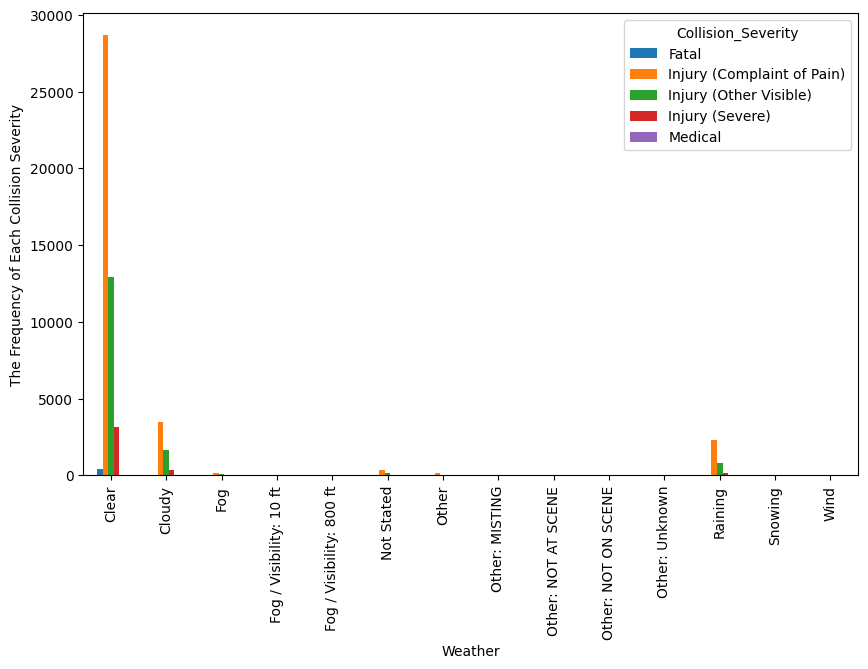

In [64]:
# Create multiple bars chart under each object to display the frequency of each collision severity
# under each kind of weather.
ax = weather_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 6)
ax.set_xlabel("Weather")
ax.set_ylabel("The Frequency of Each Collision Severity")

### Observation and Inference
- It is surprising to see that the mojority of the collision happens in the clear weather.
- And there are only small amount of the collision happens in cloudy, fog and rainning weather.
- The majority of the collision severity is injury(complaint of pain) under each kind of weather.
- We can make inference from this point that maybe the drivers are more conscious when they drive under the less clear weather so the collision is less likely to happen under the unclear weather.
- When the weather is clear, it is likely that the drivers are less careful about the consitions of the road so the collisions are more likely to happen.

### Create a Hotspot Map and Bar Charts for Question 1

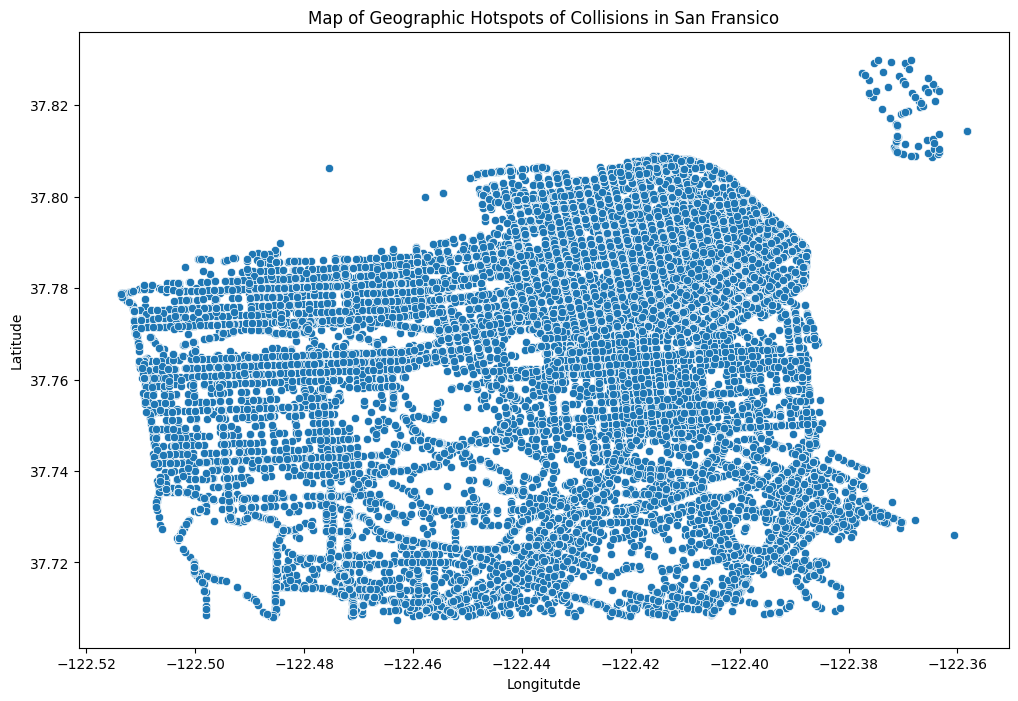

In [65]:
# Display a scatterplot showing the Latitude and Longitude of each collision
plt.figure(figsize=(12,8))
seaborn.scatterplot(x = 'Longitude', y = 'Latitude', data = collision_df)
plt.title('Map of Geographic Hotspots of Collisions in San Fransico')
plt.xlabel('Longitutde')
plt.ylabel('Latitude')
plt.show()

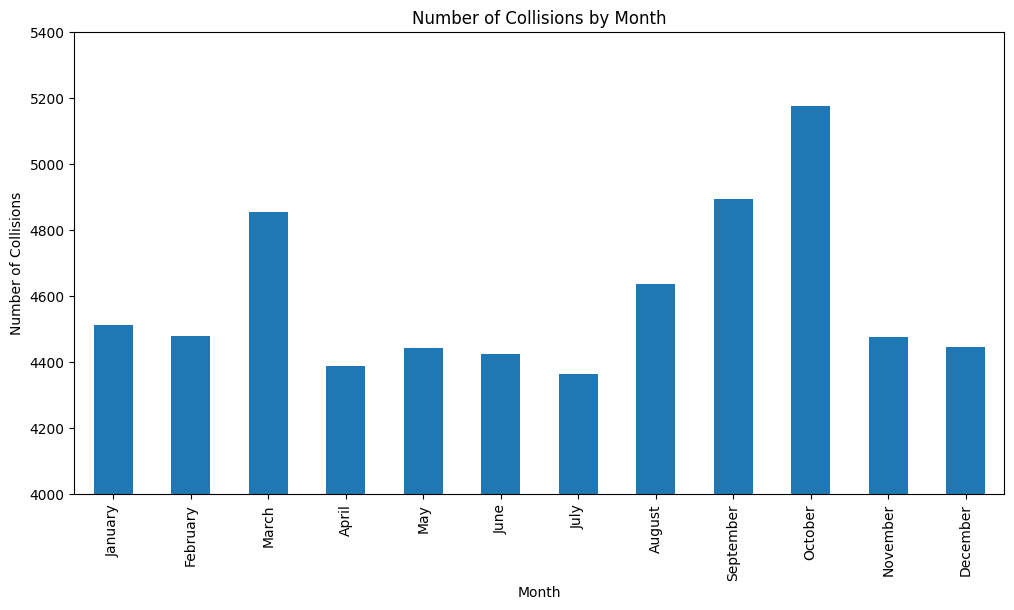

In [66]:
# Collisions by Month
plt.figure(figsize = (12,6))

organize_month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
collision_df['Month'] = pd.Categorical(collision_df['Month'], categories=organize_month_order, ordered=True)

collision_df['Month'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Collisions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.ylim(4000,5400)
plt.show()

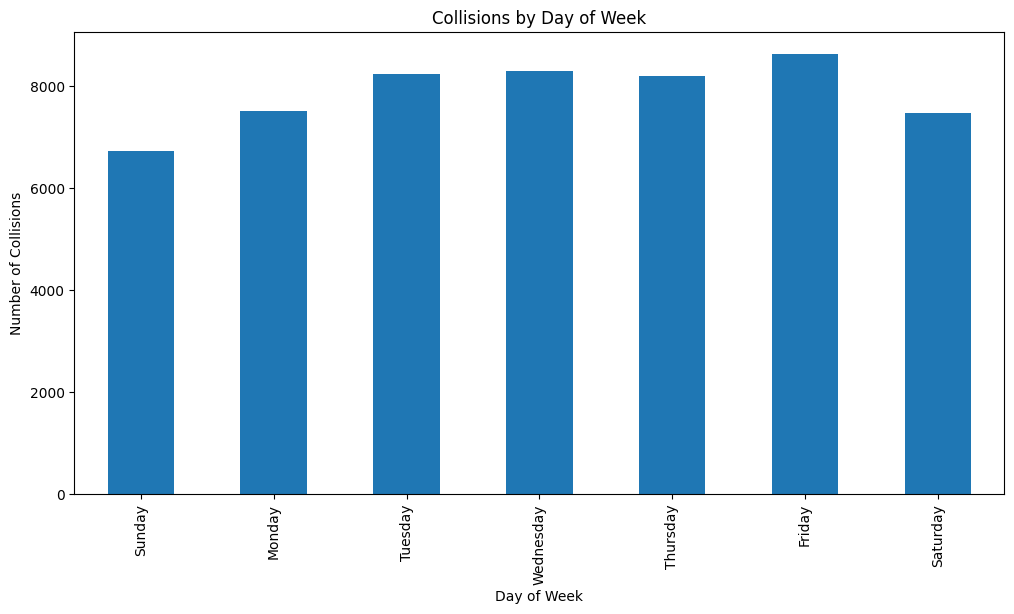

In [68]:
# Collisions by day of week

plt.figure(figsize = (12,6))

organize_day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
collision_df['Day_of_Week'] = pd.Categorical(collision_df['Day_of_Week'], categories=organize_day_order, ordered=True)

collision_df['Day_of_Week'].value_counts().sort_index(ascending = True).plot(kind = 'bar')
plt.title('Collisions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Collisions')
plt.show()

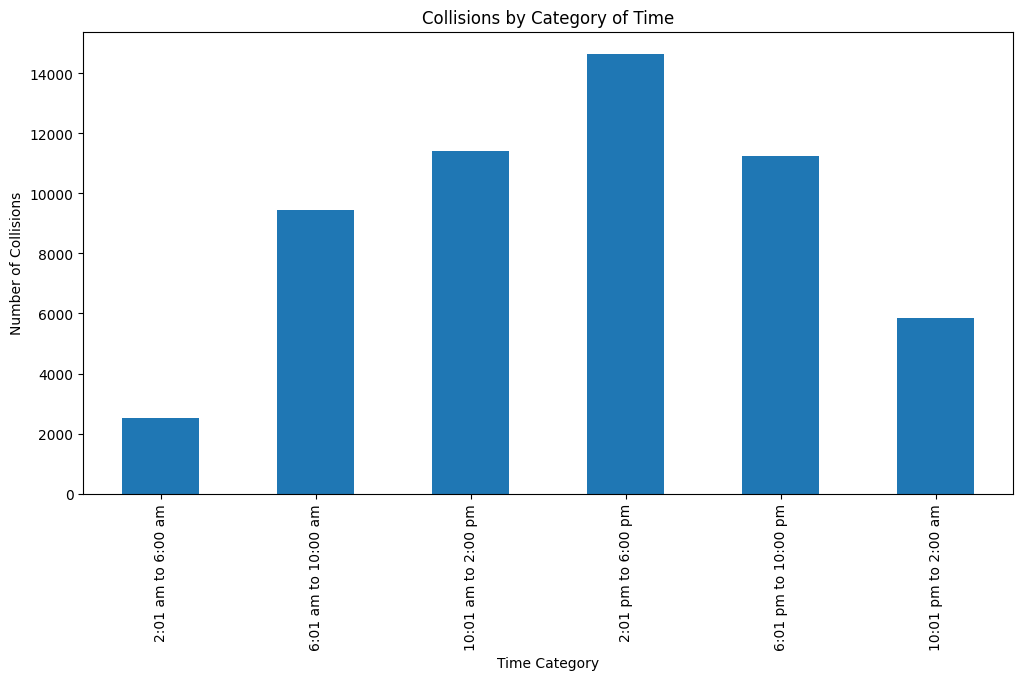

In [70]:
# Collisions by a Certain Time

plt.figure(figsize = (12,6))

organize_time_cat_order = ["2:01 am to 6:00 am", "6:01 am to 10:00 am", "10:01 am to 2:00 pm", "2:01 pm to 6:00 pm", "6:01 pm to 10:00 pm", "10:01 pm to 2:00 am"]
collision_df['Time_Category'] = pd.Categorical(collision_df['Time_Category'], categories=organize_time_cat_order, ordered=True)


collision_df['Time_Category'].value_counts().sort_index(ascending = True).plot(kind = 'bar')
plt.title('Collisions by Category of Time')
plt.xlabel('Time Category')
plt.ylabel('Number of Collisions')
plt.show()

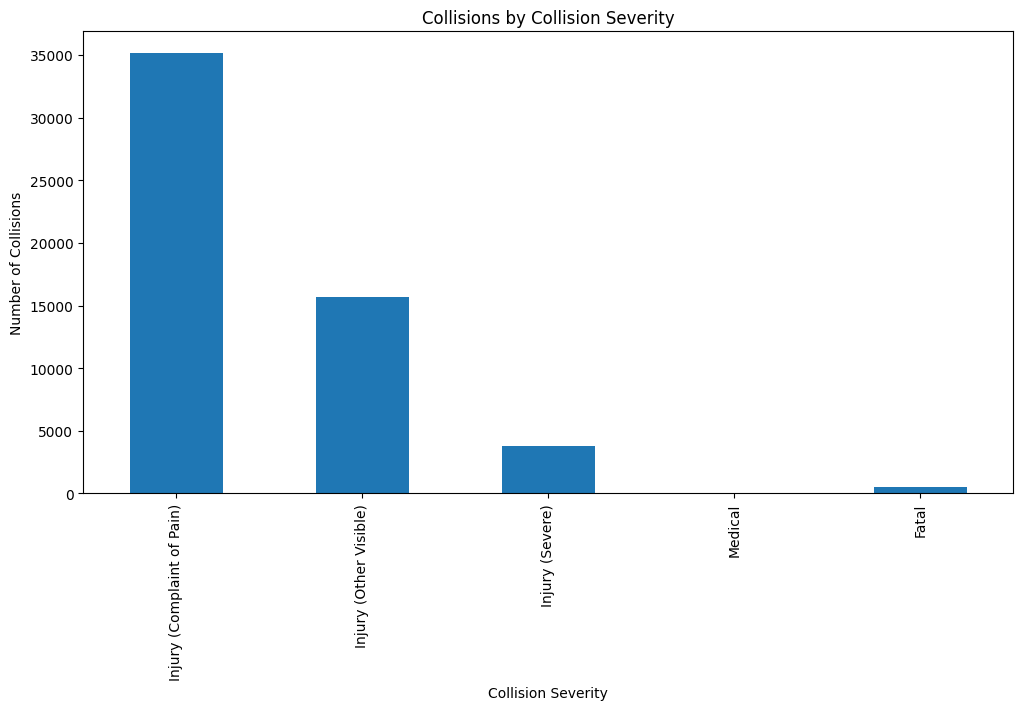

In [73]:
# Collisions by Collision Severity

plt.figure(figsize = (12,6))

organize_col_sev_order = ["Injury (Complaint of Pain)", "Injury (Other Visible)", "Injury (Severe)", "Medical", "Fatal"]
collision_df['Collision_Severity'] = pd.Categorical(collision_df['Collision_Severity'], categories=organize_col_sev_order, ordered=True)

collision_df['Collision_Severity'].value_counts().sort_index(ascending = True).plot(kind = 'bar')
plt.title('Collisions by Collision Severity')
plt.xlabel('Collision Severity')
plt.ylabel('Number of Collisions')
plt.show()

In [75]:
total_number_killed = int(collision_df['Number_Killed'].sum())
print(f'The total number of people killed in collisions in San Fransico from 2005 to 2023 is {total_number_killed}.')

The total number of people killed in collisions in San Fransico from 2005 to 2023 is 513.


# Discover relationship between vehicle brand and collisions

In [77]:
# Discover relationship between vehicle equipment and number of party killed from the collision
collision_party_df.groupby(by='Party_Safety_Equipment_1')['Party_Number_Killed'].sum()

Party_Safety_Equipment_1
Air Bag Deployed                            41
Air Bag Not Deployed                        18
Child Restraint in Vehicle, Improper Use     0
Child Restraint in Vehicle, Use Unknown      0
Lap Belt Not Used                            0
Lap Belt Used                                1
Lap/Shoulder Harness Not Used                2
Lap/Shoulder Harness Used                   13
M/C Helmet Driver - No                       1
M/C Helmet Driver - Yes                      9
M/C Helmet Passenger - No                    0
M/C Helmet Passenger - Yes                   0
No Child Restraint in Vehicle                0
None In Vehicle                              1
Not Required                                38
Not Stated                                  19
Other                                        0
Passive Restraint Not Used                   0
Passive Restraint Used                       0
Shoulder Harness Not Used                    0
Shoulder Harness Used              

Observation: The number of party killed is high with air bag equipment cpmparing without air bag deployed. The number of people killed is higher when lap/shoulder harness is used. The highest number of party killed can be seen in the not stated group of vehicle safety equipment1.
Inference: The number of people killed can be more likely to increase, if the air bag is not deployed in the vehicle. However, the our observation shows the opposite result due to the other hidden factors such as the type of collision that we have to more analyze further variables.

In [79]:
# Discover relationship between vehicle make and number of people killed in collision
collision_party_df.groupby(by= 'Vehicle_Make')['Party_Number_Killed'].sum()

Vehicle_Make
(Outside vehicle) Honda/Odyssey/Bronze    0
0000                                      0
1999/CHEV/WHITE                           0
2005 HONDA ACCORD                         0
2014/MERZ/RED                             0
                                         ..
vespa lx150                               0
white/ Honda Civic                        0
yama/vino/red                             0
yamaha rs silver                          0
yamaha/zuma/gray                          0
Name: Party_Number_Killed, Length: 12857, dtype: int64

Observation cannot be clearly seen in the output so that it is difficult to make inference

In [81]:
# Identify number of people killed from collision in each year
collision_party_df.groupby(by= 'Accident_Year')['Party_Number_Killed'].sum()

Accident_Year
2005     9
2006    10
2007    14
2008     6
2009     9
2010     6
2011     8
2012    11
2013    12
2014     2
2015     2
2016     6
2017     5
2018     6
2019     4
2020    10
2021    11
2022    14
2023     2
Name: Party_Number_Killed, dtype: int64

Observation: The number of party killed in each year is significantly decrease from year 2022 to 2023.
Inference: We can infer that more people are likely to follow the traffic laws. Another inference would be the change of people livestyle, for example, people work and/or learn remotely after the Covid 19 pandemic.

In [82]:
# Calculate the number of collisions from year 2005 to 2023
collision_party_df.groupby(by= 'Accident_Year').size().to_frame('Count')
# sum().sort_values()

,Count
Accident_Year,
2005,4909
2006,4199
2007,4478
2008,4271
2009,4033
2010,4253
2011,4168
2012,4330
2013,3925


# Discover relationship between vehicle equipment and collisions

In [88]:
# Identify number of party killed (party_involved) in the crash in terms of California vehicle code of violations
collision_party_df.groupby(by= 'VZ_PCF_Description')['Party_Number_Killed'].sum()

VZ_PCF_Description
Actions required at flashing red signal                                                       0
Actions required at flashing yellow signal                                                    0
Allowing riding on portion of vehicle or bicycle not designed for passenger use prohibited    0
Bicycle parked - impeding pedestrian traffic prohibited                                       0
Bicycle riding - general rights and responsibilities                                          0
                                                                                             ..
Violation of right-of-way or uncontrolled intersection                                        0
Violations of vehicles or bicycles for hire not imputed to bona fide passengers               0
Willfully on wrong way on divided highway and causing injury or death                         0
Wrong way driving                                                                             1
Youthful Drunk Driver

Observation: The number of people killed is slightly increased in the code of violation of the wrong way driving.

In [90]:
# Identify number of people injured in the crash in terms of California vehicle code of violations
x=collision_df.groupby(by= 'VZ_PCF_Description')['Number_Injured'].sum()
x[x>50].sort_values(ascending=False)

VZ_PCF_Description
Unsafe speed for prevailing conditions                                                       13889
Red signal - driver or bicyclist responsibilities                                             8829
Driver or bicyclist to yield right-of-way at crosswalks                                       5940
Violation of right-of-way - left turn                                                         4646
Unsafe turn or lane change prohibited                                                         4262
Unknown                                                                                       4185
Following too closely prohibited                                                              2664
Failure to stop at STOP sign                                                                  2322
Unsafe starting or backing on highway                                                         2054
Violation of right-of-way - entering through highway                                      

Observation: The highest injured people was found in the unsafe speed category.
Inference: We can infer that more people are less likely to follow the traffic laws especially the 'speed limit'.

# Discover relationship between the year of manufacturing of vehicle and year of collisions

In [92]:
# Discover the relationship between the year of manufacturing and the collision year

In [94]:
# Create a new column indicating the the year of use of the accident car
collision_party_df['Year_of_Use'] = collision_party_df['Accident_Year'] - collision_party_df['Vehicle_Year']
collision_party_df

<ipython-input-94-a7971bcbc9dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_party_df['Year_of_Use'] = collision_party_df['Accident_Year'] - collision_party_df['Vehicle_Year']


,Latitude,Longitude,Geocode_Source,Collision_Datetime,Collision_Date,Collision_Time,Accident_Year,Month,Day_of_Week,Time_Category,...,Direction_of_Travel,Party_Safety_Equipment_1,Financial_Responsibility,Party_Number_Killed,Movement_Pre_Accident,Vehicle_Year,Vehicle_Make,Steered_Vehicle_Type,Race,Year_of_Use
unique_id,,,,,,,,,,,,,,,,,,,,,
64090,37.768140,-122.422199,SFPD-CROSSROADS,2009-11-26 02:44:00,2009 November 26,02:44:00,2009,November,Thursday,2:01 am to 6:00 am,...,South,Not Stated,Not Applicable,0,Making Left Turn,1973.0,Not Stated,Bicycle,White,36.0
640826,37.782296,-122.405931,SFPD-INTERIM DB,2023-01-23 18:47:00,2023 January 23,18:47:00,2023,January,Monday,6:01 pm to 10:00 pm,...,North,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,2019.0,White Toyota Camry,Passenger Car,Other,4.0
29450,37.750450,-122.421438,SFPD-CROSSROADS,2012-03-15 08:41:00,2012 March 15,08:41:00,2012,March,Thursday,6:01 am to 10:00 am,...,West,Air Bag Not Deployed,Not Stated,0,Proceeding Straight,1992.0,BUICK,Passenger Car,Black,20.0
638140,37.731686,-122.419808,SFPD-INTERIM DB,2022-12-30 00:03:00,2022 December 30,00:03:00,2022,December,Friday,10:01 pm to 2:00 am,...,North,Air Bag Deployed,Yes Proof of Insurance Obtained,0,Proceeding Straight,2010.0,TOYOTA/MATRIX/BLK,Passenger Car,Asian,12.0
640237,37.712547,-122.407348,SFPD-INTERIM DB,2023-01-07 21:09:00,2023 January 07,21:09:00,2023,January,Saturday,6:01 pm to 10:00 pm,...,South,Air Bag Deployed,Yes Proof of Insurance Obtained,0,Proceeding Straight,2010.0,TOYT/RAV4/BLU,Passenger Car,Asian,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71273,37.781717,-122.453170,SFPD-CROSSROADS,2012-03-11 05:23:00,2012 March 11,05:23:00,2012,March,Sunday,2:01 am to 6:00 am,...,East,Air Bag Deployed,Yes Proof of Insurance Obtained,0,Proceeding Straight,2003.0,MITSUBISHI,Passenger Car,White,9.0
23694,37.774181,-122.429178,SFPD-INTERIM DB,2018-10-09 20:02:00,2018 October 09,20:02:00,2018,October,Tuesday,6:01 pm to 10:00 pm,...,East,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Changing Lanes,2015.0,KIA / SOL / WHI,Passenger Car,Hispanic,3.0
67217,37.773847,-122.439277,SFPD-CROSSROADS,2010-12-01 11:05:00,2010 December 01,11:05:00,2010,December,Wednesday,10:01 am to 2:00 pm,...,West,Air Bag Not Deployed,Yes Proof of Insurance Obtained,0,Making Left Turn,1995.0,TOYOTA,Passenger Car,Asian,15.0


In [96]:
# Count the number of values for the difference between the vehicle year and accident year
collision_party_df['Year_of_Use'].value_counts()

1.0       6131
2.0       5654
3.0       5315
4.0       5247
5.0       4949
          ... 
124.0        1
64.0         1
1924.0       1
66.0         1
1917.0       1
Name: Year_of_Use, Length: 130, dtype: int64

Text(0, 0.5, 'Frequency')

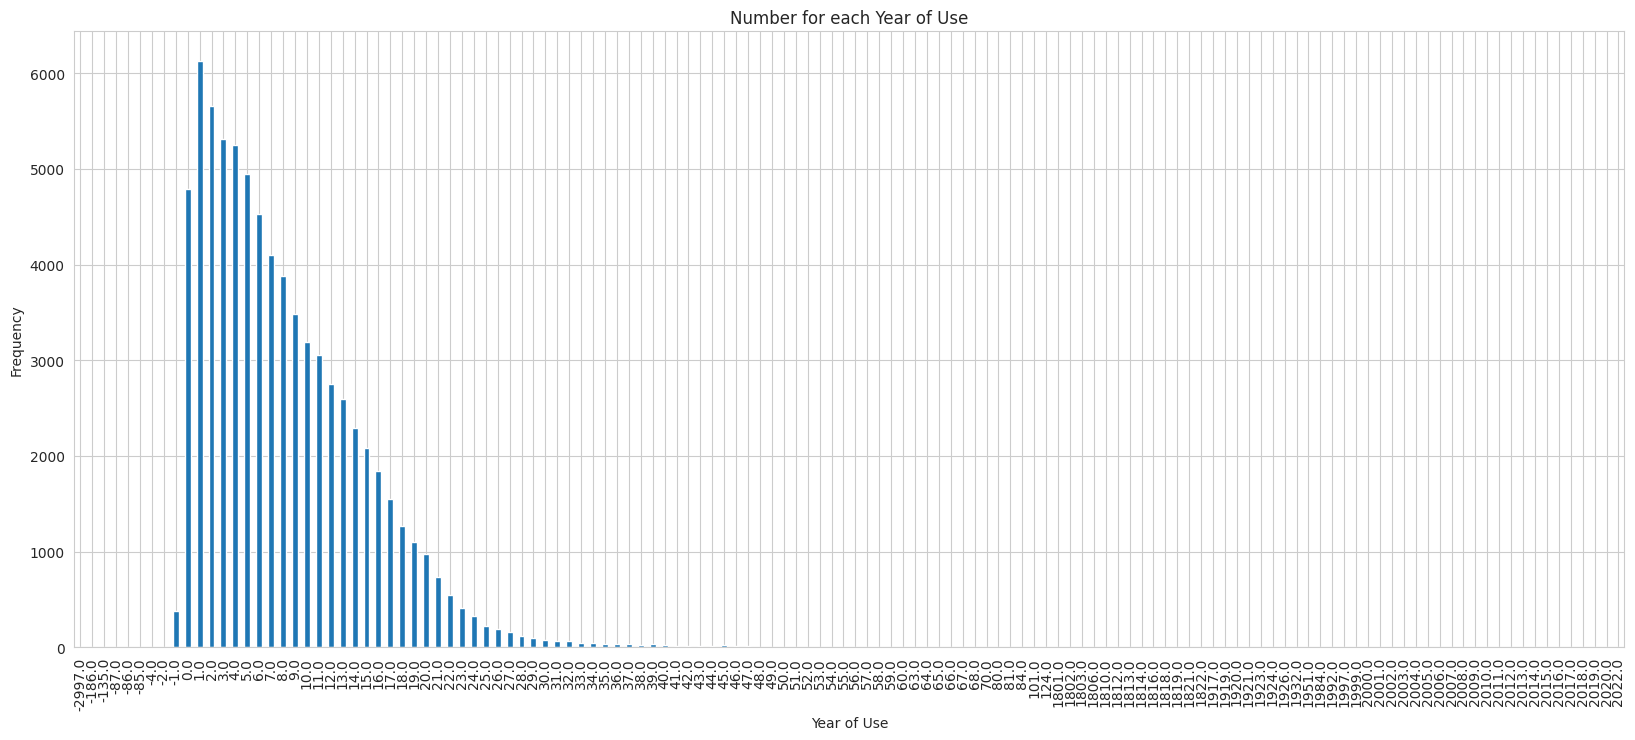

In [97]:
# Create a bar chart to display the the frequency of collision for each year of use of cars for further analysis.
ax = collision_party_df.groupby(['Year_of_Use'])['Month'].count().plot.bar(title="Number for each Year of Use", figsize=(20,8))
ax.set_xlabel('Year of Use')
ax.set_ylabel('Frequency')

### Observation and Inference
- Most of the care crashes happens within the first few years of the use of the car.
- In the dataset, the first year of the car use has a highest frequency of the collision among all the other year of use.
- We can make inference from this point that maybe the new drivers are more likely to occur car collisions.

# Create a Bar Chart for Question 2

In [ ]:
### Balaji

# Trend Analysis for collisions over time using the line chart

Here, we have used the groupby function to group the collision data by the 'Accident Year' and then calculated the size of each group, representing the number of collisions for each year. By using plt.plot(), we created a line chart with years on the x-axis and the corresponding number of collisions on the y-axis. This visual representation allows us to observe trends and variations in the frequency of collisions over time.

**Purpose:**

**Data Aggregation:** The use of groupby allows us to aggregate the data and observe the overall trend rather than individual data points.

**Visualization:** A line chart is chosen for its effectiveness in displaying trends over time, providing a clear representation of how the number of collisions has changed from 2005 to 2023.

In [99]:
# Grouping the data by 'Accident Year' and calculating the count of collisions for each year
collision_count_by_year = collision_df.groupby('Accident_Year').size()

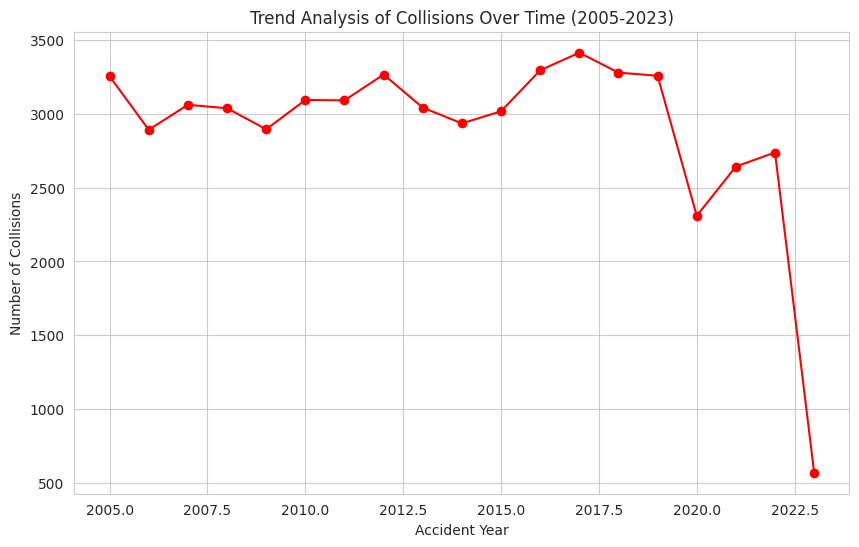

In [100]:
#line chart
plt.figure(figsize=(10, 6))
plt.plot(collision_count_by_year.index, collision_count_by_year.values, marker='o', linestyle='-', color='r')
plt.title('Trend Analysis of Collisions Over Time (2005-2023)')
plt.xlabel('Accident Year')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

# *Observations and Inferences from Trend Analysis of Collisions Over Time (2005-2023)*
The line chart, titled "Trend Analysis of Collisions Over Time (2005-2023)," provides insights into the changing dynamics of collisions over the specified years.

**Observations:**

There is an apparent decline in the number of collisions from 2005 to around 2015, followed by a fluctuating pattern in the subsequent years.Some detailed observations are as follows:

*   *Periods of Stability and Fluctuation:*
Between 2005 and 2007.5, there is a slight decrease followed by an increase, indicating some fluctuation.The period from 2010 to 2012.5 shows relative stability with a slight increase in collisions. Between 2012.5 and 2015, a significant decline is observed, reaching a low point around 2900 collisions.

*   *Peak Years:* The years around 2017.5 show a peak in collisions, reaching approximately 3400, followed by a gradual decline.

*   *Significant Drops:* A substantial drop in collisions is noticeable in the years 2017.5 to 2020, with the numbers decreasing from around 3400 to 2300.In the years 2020 onwards, there is a temporary rise in collisions, reaching around 2800, but it is followed by a significant drop to approximately 550.


**Inferences:**



*   *Covid-19 Pandemic Influence (2020 Onwards):* The sharp drop in collisions post-2020 could be directly related to the global pandemic of COVID-19. Lockdowns and restrictions during the pandemic likely resulted in reduced traffic volume, contributing to a significant decline in collisions.

*   *Impact of External Factors on Peaks and Declines:* The peak in collisions around 2017.5 might be attributed to external factors, such as increased traffic volume. The subsequent significant drop from 2017.5 to 2020 suggests adaptive strategies or changes in driving behavior in response to these external factors.

*   *Weather Conditions and Collisions:* Fluctuations in collisions between 2015 and 2017.5, with a subsequent decline, could be associated with variations in weather in San Francisco, affecting road conditions and driver behavior.